<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Wan_sobel_and_laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this code we are going to explore about sobel and laplacian**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the package that we will use for the code.

In [2]:
# Import the necessary packages
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [3]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/image/mjiit.jpg"
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 2. The cv2.imread function returns a NumPy array representing the image.

On line 3, we convert the image into grayscale.

Then, displaying the actual image on our screen. The parameter is a reference to the image we convert before.

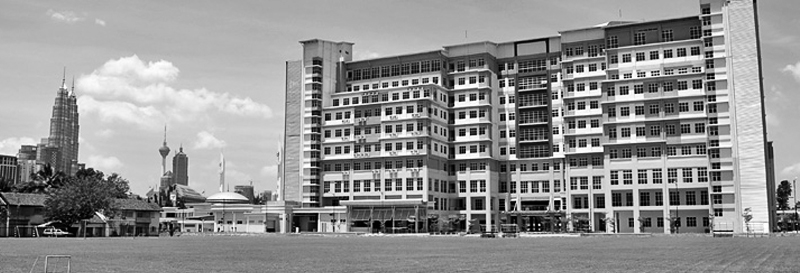

In [4]:
# Task 2
# Load the image :
image = cv2.imread(args["image"])

# Task 3
# Convert image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)

On Line 2, we use the Laplacian method to compute the gradient magnitude image by calling the cv2.Laplacian function. The ﬁrst argument is our grayscale image – the image we want to compute the gradient magnitude representation for. The second argument is our data type for the output image.

In order to ensure you catch all edges, use a ﬂoating point data type, then take the absolute value of the gradient im- age and convert it back to an 8-bit unsigned integer, as in Line 3. This is deﬁnitely an important technique to take note of – otherwise you’ll be missing edges in your image!

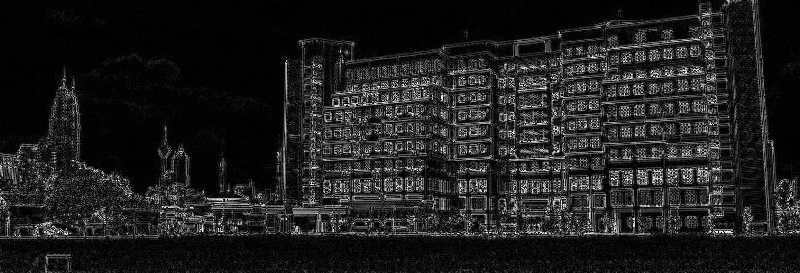

In [5]:
# Task 4
# Compute the Laplacian of the image
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))


cv2_imshow(lap)



Using the Sobel operator, we can compute gradient magnitude representations along the x and y axis, allowing us to ﬁnd both horizontal and vertical edge-like regions.

In fact, that’s exactly what Lines 2 and 3 do by using the cv2.Sobel method. The ﬁrst argument to the Sobel operator is the image we want to compute the gradient representation for. Then, just like in the Laplacian example above, we use a ﬂoating point data type. The last two arguments are the order of the derivatives in the x and y direction, respectively. Specify a value of 1 and 0 to ﬁnd vertical edge-like regions and 0 and 1 to ﬁnd horizontal edge-like regions.

In [6]:
# Task 5
# Compute Sobel for x-axis and y axis gradients along the X and Y axis, respectively
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

On Lines 8 and 9 we then ensure we ﬁnd all edges by taking the absolute value of the ﬂoating point image and then converting it to an 8-bit unsigned integer.

In [7]:
# The sobelX and sobelY images are now of the floating
# point data type -- we need to take care when converting
# back to an 8-bit unsigned integer that we do not miss
# any images due to clipping values outside the range
# of [0, 255]. First, we take the absolute value of the
# graident magnitude images, THEN we convert them back
# to 8-bit unsigned integers
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

In order to combine the gradient images in both the x and y direction, we can apply a bitwise OR. Remember, an OR operation is true when either pixel is greater than zero. Therefore, a given pixel will be True if either a horizontal or vertical edge is present.

In [8]:
# Task 6
# Combine our Sobel gradient images using bitwise OR
sobelCombined = cv2.bitwise_or(sobelX, sobelY)

Finally, we show our gradient images on Lines 2-4.

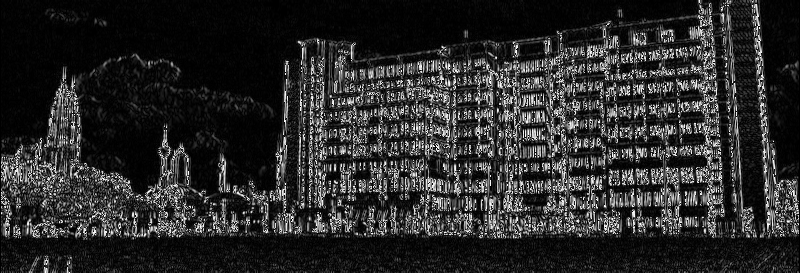

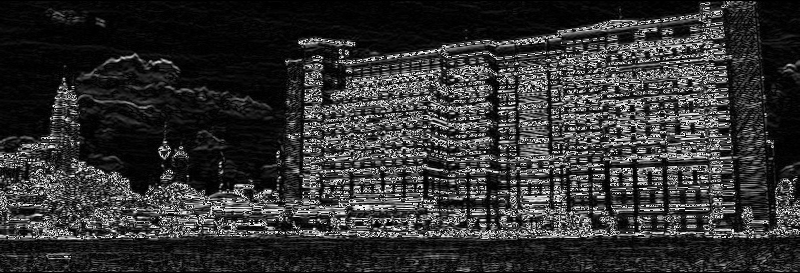

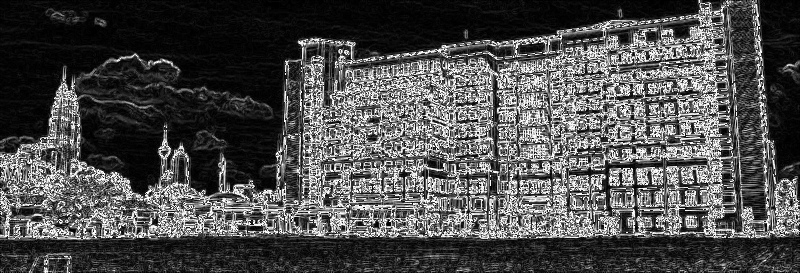

In [9]:
# Show our Sobel images
cv2_imshow(sobelX)
cv2_imshow(sobelY)
cv2_imshow(sobelCombined)




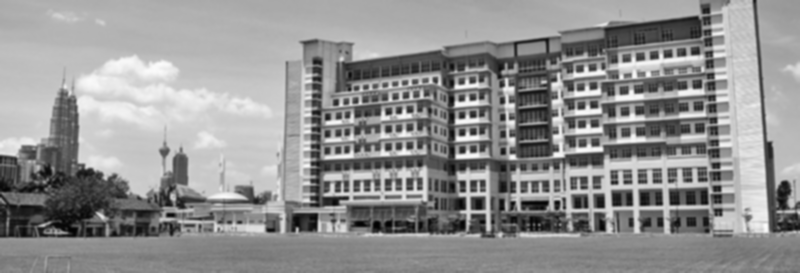

In [10]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(blurred)


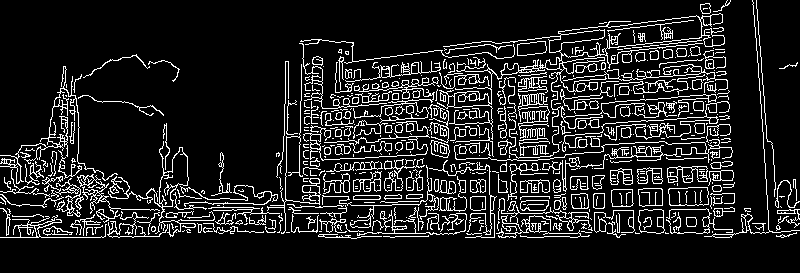

In [11]:
edged = cv2.Canny(blurred, 30, 150)
cv2_imshow(edged)

